<a href="https://colab.research.google.com/github/makeitlearnML/Web-Scraping-works/blob/main/scraping_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

components of python request() module:

*   API parameters: e.g symbols.. defined in api docs dented with ?.
*   headers: contains authentication key, content type
Only in POST req.:
*   Body/data: In a post request we send data to server/url. data can be in list of tuples or dict.
*   Json: A JSON object to send to the specified url
*   auth: {authentication key}


requests.post(url, data={key: value}, json={key: value}, args)


In [1]:
import requests
import json
# adding '&' any parameter on url using '?', non parameter keys name will be on api docs..e.g history

Here we are going to use "exchangerate.host" API to fetch foreign exhange for different rates & build a Exchange rate Calculator

In [ ]:
# Under the API documentation we can find various END Points of this API: LATEST exchange rate, Historical rates, Timeseries data.

In [ ]:
# Let's fetch some latest rates for currencies
url= 'https://api.exchangerate.host/latest' +'?symbols=INR'+'&'+'?base=USD'

response = requests.get(url)
data = response.json()

In [ ]:
data.keys()

dict_keys(['motd', 'success', 'base', 'date', 'rates'])

In [ ]:
json.dumps(data, indent= 6)

'{\n      "motd": {\n            "msg": "If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.",\n            "url": "https://exchangerate.host/#/donate"\n      },\n      "success": true,\n      "base": "EUR",\n      "date": "2023-09-05",\n      "rates": {\n            "INR": 89.226777\n      }\n}'

In [ ]:
# defining a fun to remove irrelevant keys
def remov_item(data):

  ir_keys= [key for key in data if key == 'motd']
  ir_keys

  for i in ir_keys:
    del data[i]

In [ ]:
# Removing irrelevant items from data
remov_item(data)

In [ ]:
data.items()

dict_items([('success', True), ('base', 'EUR'), ('date', '2023-09-05'), ('rates', {'INR': 89.226777})])

In [15]:
# historical exchange rate for INR base as USD:
base_url= "https://api.exchangerate.host/2023-02-18" +"?symbols=INR,AED"  +"&" +"base=USD"

In [16]:
base_url

'https://api.exchangerate.host/2023-02-18?symbols=INR,AED&base=USD'

In [17]:
response= requests.get(base_url)

In [18]:
data= response.json()
data

{'motd': {'msg': 'If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.',
  'url': 'https://exchangerate.host/#/donate'},
 'success': True,
 'historical': True,
 'base': 'USD',
 'date': '2023-02-18',
 'rates': {'AED': 3.670687, 'INR': 82.753348}}

In [ ]:
print(f"the base currency is: {data['base']}")
print(f"exchange currencies are: {data['rates']}")
print(f"Exchange rate date: {data['date']}")

the base currency is: USD
exchange currencies are: {'AED': 3.670687, 'INR': 82.753348}
Exchange rate date: 2023-02-18


In [ ]:
# Historical data periodwise: i.e we will add a parameter timeseries mentioned in api documentation

In [ ]:
import requests
import json

In [31]:
hist_p_url= "https://api.exchangerate.host/timeseries" +"?base=USA"+ "&" +"symbols=INR,QAR"+"?start_date=2020-01-01" +"&" +"end_date=2020-01-05"
hist_p_url

'https://api.exchangerate.host/timeseries?base=USA&symbols=INR,QAR?start_date=2020-01-01&end_date=2020-01-05'

In [34]:
Res= requests.get(hist_p_url)
Res

<Response [200]>

In [36]:
Res.json()

{'motd': {'msg': 'If you or your company use this project or like what we doing, please consider backing us so we can continue maintaining and evolving this project.',
  'url': 'https://exchangerate.host/#/donate'},
 'success': True,
 'timeseries': True,
 'base': 'USA',
 'start_date': '2023-09-05',
 'end_date': '2020-01-05',
 'rates': {}}

In [ ]:
remov_item(data_timeseries)
json.dumps(data_timeseries, indent= 6)

'{\n      "success": true,\n      "timeseries": true,\n      "base": "EUR",\n      "start_date": "2023-01-31",\n      "end_date": "2023-09-05",\n      "rates": {}\n}'

In [ ]:
url = 'https://api.exchangerate.host/timeseries?start_date=2020-01-01&end_date=2020-01-04'
response = requests.get(url)
data = response.json()


# Exhchange rate Currency Calculator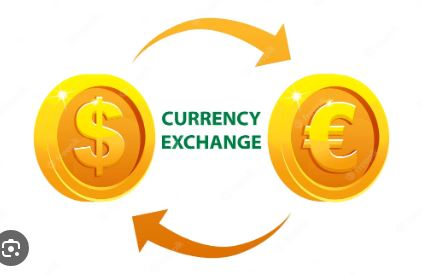

1. Gathering relevant API parameters
2. Constructing the URL & send a GET request to it
3. For unsuccessful requests: print error message
4. For successful req: Extract relevant data & calculating the result

In [ ]:
# Required Parameters to look for in API doc: date, base currency, target curr. & input quantity

base_url= 'https://api.exchangerate.host'

base_curr= input("convert from curr: ")
date = input("please enter date in 'yyyy-mm-dd' format: ")
target_curr= input("please enter symbols or ur target curr: ")
quan= int(input("enter the curr. value to be converted: "))

url= base_url +"/" +date +"?base=" +base_curr +"&symbols=" +target_curr
url

convert from curr: USA
please enter date in 'yyyy-mm-dd' format: 2023-02-18
please enter symbols or ur target curr: INR
enter the curr. value to be converted: 1000


'https://api.exchangerate.host/2023-02-18?base=USA&symbols=INR'

In [ ]:
res= requests.get(url)
res

<Response [200]>

In [ ]:
if (res.ok is False):
  print("\nError {}:".format(response.status_code))
  print(response.json()['error'])

else:
  data= res.json()
  rate= data['rates'][target_curr]

  result = quan * rate
  print(f"the calculated amt. in {target_curr} as per current exchange rate of {base_curr} is: {result}")

the calculated amt. in INR as per current exchange rate of USA is: 88748.99399999999


Working with

## **Itunes api**


In [ ]:
tune_url= 'https://itunes.apple.com/search'
tune_url

'https://itunes.apple.com/search'

In [ ]:
r= requests.get(tune_url, params ={"term": "the beatles", "country": "us"})
r

<Response [200]>

In [ ]:
data= r.json()
print(json.dumps(data, indent= 4))


{
    "resultCount": 50,
    "results": [
        {
            "wrapperType": "audiobook",
            "artistId": 160778930,
            "collectionId": 1439484338,
            "artistName": "Bob Spitz",
            "collectionName": "The Beatles (Abridged)",
            "collectionCensoredName": "The Beatles (Abridged)",
            "artistViewUrl": "https://books.apple.com/us/author/bob-spitz/id160778930?uo=4",
            "collectionViewUrl": "https://books.apple.com/us/audiobook/the-beatles-abridged/id1439484338?uo=4",
            "artworkUrl60": "https://is3-ssl.mzstatic.com/image/thumb/Music128/v4/69/b8/65/69b86591-ce4b-9bd0-ab71-3808d0ea06dc/9780743552455.jpg/60x60bb.jpg",
            "artworkUrl100": "https://is3-ssl.mzstatic.com/image/thumb/Music128/v4/69/b8/65/69b86591-ce4b-9bd0-ab71-3808d0ea06dc/9780743552455.jpg/100x100bb.jpg",
            "collectionPrice": 16.99,
            "collectionExplicitness": "notExplicit",
            "trackCount": 1,
            "country": "US

In [ ]:
data.keys()

dict_keys(['resultCount', 'results'])

In [ ]:
data['resultCount']

50

In [ ]:
data['results'][0]

{'wrapperType': 'audiobook',
 'artistId': 160778930,
 'collectionId': 1439484338,
 'artistName': 'Bob Spitz',
 'collectionName': 'The Beatles (Abridged)',
 'collectionCensoredName': 'The Beatles (Abridged)',
 'artistViewUrl': 'https://books.apple.com/us/author/bob-spitz/id160778930?uo=4',
 'collectionViewUrl': 'https://books.apple.com/us/audiobook/the-beatles-abridged/id1439484338?uo=4',
 'artworkUrl60': 'https://is3-ssl.mzstatic.com/image/thumb/Music128/v4/69/b8/65/69b86591-ce4b-9bd0-ab71-3808d0ea06dc/9780743552455.jpg/60x60bb.jpg',
 'artworkUrl100': 'https://is3-ssl.mzstatic.com/image/thumb/Music128/v4/69/b8/65/69b86591-ce4b-9bd0-ab71-3808d0ea06dc/9780743552455.jpg/100x100bb.jpg',
 'collectionPrice': 16.99,
 'collectionExplicitness': 'notExplicit',
 'trackCount': 1,
 'country': 'USA',
 'currency': 'USD',
 'releaseDate': '2005-11-01T08:00:00Z',
 'primaryGenreName': 'Biographies & Memoirs',
 'previewUrl': 'https://audio-ssl.itunes.apple.com/itunes-assets/AudioPreview123/v4/8a/3b/60/8a3